In [ ]:
#Simple RGB full differential
from PIL import Image
import matplotlib.pyplot as plt
#Read image
img=Image.open('t1.jpg') 
#img =img.transpose(Image.ROTATE_90)
#show image
plt.imshow(img)
plt.show()
img.size

(24, 24, 3)

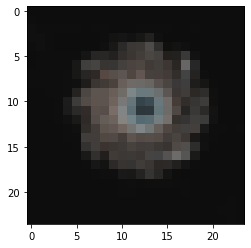

In [13]:
import numpy as np
w, h = img.size
#instrumentName = 'harp'  #actual sound must be chosen after importing MIDI file into a DAW
#note_str=['X','C2', 'C3', 'G3', 'C4', 'E4', 'G4', 'A#4', 'C5', 'D5', 'E5', 'F#5', 'G5', 'G#5'] #first 13 notes of the harmonic series
#instrumentName = 'drums'
#note_str=['X','C2', 'D2', 'E2', 'F#2', 'G#2', 'A#2', 'G2', 'A2', 'C3', 'D#3', 'E3', 'C#3', 'A3'] #drum 'notes'
# A, A#, B, C, C#, D, D#, E, F, F#, G, G#  #violon 'notes'
note_str=['X','C1', 'C2', 'G2', 'C3', 'E3', 'G3', 'A3', 'B3', 'D4', 'E4', 'G4', 'A4', 'B4',
         'D5', 'E5', 'G5', 'A5', 'B5','D6', 'E6', 'F#6', 'G6', 'A6',] #drum 'notes'
min_note=36
max_note=76
note_range =len(note_str)  # you can try full note =>max_note-min_note   (+some changes in the last cell)
small_img=img.resize((round(w/h*note_range),note_range),Image.BILINEAR)
plt.imshow(small_img)
np.array(small_img).shape

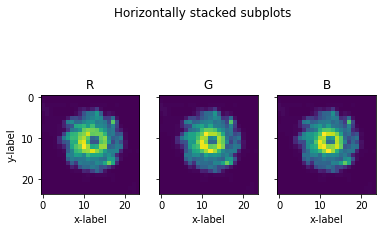

In [14]:
img0 = np.asarray(np.array(small_img)[:,:,0])
#img0 = Image.fromarray(img0, 'L')
img1 = np.asarray(np.array(small_img)[:,:,1])
#img1 = Image.fromarray(img1, 'L')
img2 = np.asarray(np.array(small_img)[:,:,2])
#img2 = Image.fromarray(img2, 'L')

fig, axs = plt.subplots(1,3)
fig.suptitle('Horizontally stacked subplots')
axs[0].imshow(img0)
axs[0].set_title('R')
axs[1].imshow(img1)
axs[1].set_title('G')
axs[2].imshow(img2)
axs[2].set_title('B')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [15]:
pixels = np.array(small_img, dtype=int)
pixels.shape

(24, 24, 3)

In [16]:
differential = np.zeros(pixels.shape)
for k in range(0,pixels.shape[2]):
    for i in range(1,note_range):
        for j in range (1,round(w/h*note_range)):
            differential[i,j,k]=max(abs(pixels[i,j,k]-pixels[i-1,j,k]),abs(pixels[i,j,k]-pixels[i,j-1,k]),
                                abs(pixels[i,j,k]-pixels[i-1,j-1,k]))

88.0 0.0 10.789930555555555


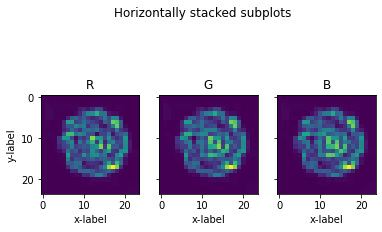

In [17]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Horizontally stacked subplots')
axs[0].imshow(differential[:,:,0])
axs[0].set_title('R')
axs[1].imshow(differential[:,:,1])
axs[1].set_title('G')
axs[2].imshow(differential[:,:,2])
axs[2].set_title('B')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
print(np.max(differential),np.min(differential),np.average(differential))

In [18]:
duration_scale= 64
min_velocity = 0
max_velocity = 127
velocity_range = max_velocity- min_velocity
x = differential
duration_img = small_img
pixels2 = np.round(np.array(duration_img, dtype=int) / duration_scale)
velocity = np.round(x / np.max(x) * velocity_range) + min_velocity

In [19]:
from midiutil import MIDIFile
from audiolazy import str2midi
bpm = 60
midifile = MIDIFile(adjust_origin=True)
midifile.addTempo(track=0, time=0, tempo=bpm)
for k in range(0,differential.shape[2]):
    for j in range(0,round(w/h*note_range)):
        for i in range(1,note_range): #pitch=i + min_note
            if velocity[i,j,k] >= 30*1.2:
                midifile.addNote(track=0, channel=0, pitch=str2midi(note_str[i]), time=j, duration=pixels2[i,j,k]+1, volume=int(velocity[i,j,k]))
    with open("srgbfd"+str(k)+".mid", "wb") as f:
        midifile.writeFile(f)